### Graded Project – Ensemble Techniques (WEEK 7)
### Domain – Mobile Apps
### Submitted by: Aniket Gupta
### Batch: eDART C II Group 1
***

# Q1. Import the necessary libraries and read the data as a data frame

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [237]:
apps = pd.read_csv("Apps_data.csv", header = 0)
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Q2 
## a. info and summary statistics of the dataset

In [238]:
apps.shape

(10841, 13)

13 columns and 10841 rows

In [239]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


1 float type and 12 object type columns

In [240]:
apps.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
apps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Missing values present.

#### Removing entries with missing values for Type, Content Rating, Current Ver, Android Ver variables and replacing missing values in Rating as the median rating value

In [242]:
apps.dropna(subset=["Type","Content Rating","Current Ver","Android Ver"],inplace=True)
apps=apps.fillna(apps.median())

In [243]:
print(apps.shape)
apps.isna().sum()

(10829, 13)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# b. Duplicate values

In [244]:
apps.duplicated(["App"], keep = "first").sum()

1181

In [245]:
apps=apps.drop_duplicates(["App"])
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [246]:
apps.duplicated(["App"], keep = "first").sum()

0

## c. Checking Category column
## d. Category with highest no. of Apps

In [247]:
apps.Category.value_counts(ascending=False)

FAMILY                 1828
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

All the categories seem fine hence no change is done.
#### d. Family category has the highest no. of apps.

## e. Distribution of rating column and converting ratings into two categories

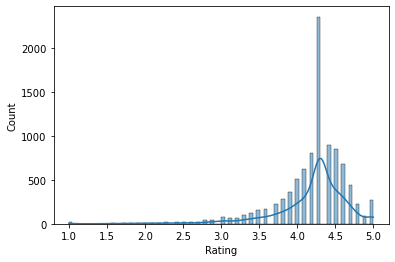

In [248]:
sns.histplot(apps.Rating, kde=True)
plt.show()

In [249]:
apps["Rating_cat"] = 0
apps["Rating_cat"].loc[apps["Rating"] < 3.5] = "low"
apps["Rating_cat"].loc[apps["Rating"] >= 3.5] = "high"

In [250]:
apps.drop("Rating", axis=1,inplace=True)
apps.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


## f. Converting the ‘Review’ column to a numerical column

In [251]:
apps["Reviews"] = pd.to_numeric(apps["Reviews"])
apps.dtypes

App               object
Category          object
Reviews            int64
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
Rating_cat        object
dtype: object

## g. Top 5 apps with highest no. of reviews

In [252]:
apps.sort_values(by = "Reviews", ascending = False).head(5)[["App","Genres"]]

,App,Genres
2544,Facebook,Social
336,WhatsApp Messenger,Communication
2545,Instagram,Social
335,Messenger – Text and Video Chat for Free,Communication
1670,Clash of Clans,Strategy


## h. Making the values of ‘Size’ as integers

In [253]:
#Converting all the values to numeric and make invalid values to NaN.
def text_to_num(text, bad_data_val = None):
    d = {
        'k': 1,
        'M': 1000,
    }
    if not isinstance(text, str):
        
        return bad_data_val

    elif text[-1] in d:
        
        num, magnitude = text[:-1], text[-1]
        return int(float(num) * d[magnitude])
    else:
        return None
    
bdv=None
apps['Size'] = apps.apply(lambda row: text_to_num(row['Size'], bdv), axis=1)
apps

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10838,Parkinson Exercices FR,MEDICAL,3,9500.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,high
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,high


## i. Removing “,” and “+” from the values of the “Installs” column

In [254]:
apps['Installs']=apps['Installs'].str.replace(",","")
apps['Installs']=apps['Installs'].str.replace("+","")
apps['Installs'] = pd.to_numeric(apps['Installs'])
apps.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


## j. Percentage of paid apps in the data

In [255]:
apps["Type"].value_counts(normalize=True)

Free    0.921953
Paid    0.078047
Name: Type, dtype: float64

<b> Percentage of paid apps is 7.8%</b>

## k. Removing the dollar sign from the “Price” column values

In [256]:
apps['Price']=apps['Price'].str.replace("$","")
apps['Price'] = pd.to_numeric(apps['Price'])
apps.dtypes

App                object
Category           object
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Rating_cat         object
dtype: object

### l. Most expensive app

In [257]:
apps.sort_values(by = "Price", ascending = False).head(1)[['App','Price']]

,App,Price
4367,I'm Rich - Trump Edition,400.0


<b>I'm Rich - Trump Edition</b> is the most expensive app costing <b>$400</b>

## m. Dropping unwanted columns

In [258]:
apps.drop(['App','Content Rating','Genres','Last Updated','Current Ver','Android Ver'], axis = 1, inplace=True)
apps.head()

,Category,Reviews,Size,Installs,Type,Price,Rating_cat
0,ART_AND_DESIGN,159,19000.0,10000,Free,0.0,high
1,ART_AND_DESIGN,967,14000.0,500000,Free,0.0,high
2,ART_AND_DESIGN,87510,8700.0,5000000,Free,0.0,high
3,ART_AND_DESIGN,215644,25000.0,50000000,Free,0.0,high
4,ART_AND_DESIGN,967,2800.0,100000,Free,0.0,high


## n. Encoding categorical column

In [259]:
apps['Rating_cat']=apps['Rating_cat'].str.replace("high","1")
apps['Rating_cat']=apps['Rating_cat'].str.replace("low","0")
apps['Type']=apps['Type'].str.replace("Free","0")
apps['Type']=apps['Type'].str.replace("Paid","1")
dummy=pd.get_dummies(apps['Category'],drop_first=True)
apps_dummy = pd.concat([apps, dummy], axis=1)
apps_dummy.head()

,Category,Reviews,Size,Installs,Type,Price,Rating_cat,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,ART_AND_DESIGN,159,19000.0,10000,0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,967,14000.0,500000,0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,87510,8700.0,5000000,0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ART_AND_DESIGN,215644,25000.0,50000000,0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ART_AND_DESIGN,967,2800.0,100000,0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
apps_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             9648 non-null   object 
 1   Reviews              9648 non-null   int64  
 2   Size                 8422 non-null   float64
 3   Installs             9648 non-null   int64  
 4   Type                 9648 non-null   object 
 5   Price                9648 non-null   float64
 6   Rating_cat           9648 non-null   object 
 7   AUTO_AND_VEHICLES    9648 non-null   uint8  
 8   BEAUTY               9648 non-null   uint8  
 9   BOOKS_AND_REFERENCE  9648 non-null   uint8  
 10  BUSINESS             9648 non-null   uint8  
 11  COMICS               9648 non-null   uint8  
 12  COMMUNICATION        9648 non-null   uint8  
 13  DATING               9648 non-null   uint8  
 14  EDUCATION            9648 non-null   uint8  
 15  ENTERTAINMENT        9648 non-null   

In [261]:
apps_dummy['Rating_cat']=apps_dummy['Rating_cat'].apply(pd.to_numeric)
apps_dummy['Type']=apps_dummy['Type'].apply(pd.to_numeric)
apps_dummy.drop(['Category'], axis = 1, inplace=True)
apps_dummy.head()

,Reviews,Size,Installs,Type,Price,Rating_cat,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,159,19000.0,10000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967,14000.0,500000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,8700.0,5000000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,25000.0,50000000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967,2800.0,100000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
apps_dummy=apps_dummy.dropna()

# Q3. Preparing data for modeling

In [263]:
X = apps_dummy.drop('Rating_cat',axis=1)
y = apps_dummy['Rating_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

In [264]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5895, 37)
(2527, 37)
(5895,)
(2527,)


# Q4. The ensemble models

In [265]:
def model_print(model, X_train, X_test, y_train, y_test):
    
    from sklearn.metrics import precision_score, recall_score, f1_score
    from sklearn.model_selection import cross_val_score
    
    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    predict = model.predict(X_test)
    precision = precision_score(y_test, predict)
    recall = recall_score(y_test, predict)
    f1_score =  2*precision*recall/(precision + recall)
    
    
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    true_pos = (predict == 1) & (actual_pos)
    false_pos = (predict == 1) & (actual_neg)
    true_neg = (predict == 0) & (actual_neg)
    false_neg = (predict == 0) & (actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return score, recall, precision, specificity, f1_score

In [266]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

from sklearn.ensemble import StackingClassifier
estimators = [('dt', dt), ('rf', rf), ('bg', bg), ('gb', gb), ('ab', ab)]
clf = StackingClassifier(estimators = estimators, final_estimator = rf)

In [267]:
result = pd.DataFrame(columns = ['score', 'recall', 'precision', 'specificity', 'f1_score'])

for model, model_name in zip([dt, rf, bg, gb, ab, clf], ['Decision tree', 'Random Forest', 'Bagging', 'Gradient Boosting', 'Ada Boost', 'Stacking']):
    result.loc[model_name] = model_print(model, X_train, X_test, y_train, y_test)

Ensemble models  decision tree, random forest, bagging classifier, Adaboosting, and gradient boosting, and
stacking classifier 

In [268]:
result

,score,recall,precision,specificity,f1_score
Decision tree,0.863079,0.924935,0.925734,0.177033,0.925334
Random Forest,0.908983,0.985332,0.920968,0.062201,0.952063
Bagging,0.892758,0.964625,0.922062,0.095694,0.942863
Gradient Boosting,0.916106,0.998706,0.917195,0.000000,0.956216
Ada Boost,0.916106,0.998706,0.917195,0.000000,0.956216
Stacking,0.912149,0.993960,0.917197,0.004785,0.954037


Gradient boosting and AdaBoost has turned out to be the best models followed by stacking. Decision tree has the worst performance among them. Gradient boosting and AdaBoost have the highest specificity as well. 

# Q5. Using model.feature_importances_ function

In [269]:
print(pd.DataFrame(gb.feature_importances_,columns =["Importance"], index=X_train.columns))

                     Importance
Reviews                0.430714
Size                   0.201928
Installs               0.190464
Type                   0.000000
Price                  0.034524
AUTO_AND_VEHICLES      0.000178
BEAUTY                 0.005483
BOOKS_AND_REFERENCE    0.007680
BUSINESS               0.006368
COMICS                 0.006454
COMMUNICATION          0.000000
DATING                 0.005258
EDUCATION              0.002336
ENTERTAINMENT          0.000000
EVENTS                 0.004818
FAMILY                 0.001319
FINANCE                0.000000
FOOD_AND_DRINK         0.001619
GAME                   0.003840
HEALTH_AND_FITNESS     0.007756
HOUSE_AND_HOME         0.000000
LIBRARIES_AND_DEMO     0.007613
LIFESTYLE              0.008430
MAPS_AND_NAVIGATION    0.004255
MEDICAL                0.000675
NEWS_AND_MAGAZINES     0.000480
PARENTING              0.006572
PERSONALIZATION        0.016168
PHOTOGRAPHY            0.002757
PRODUCTIVITY           0.000693
SHOPPING

# Q6. Result of the dataset

### The overall scores of Gradient boosting and AdaBoost have turned out to be the best followed by stacking. 
### Decision tree has the worst performance among them. Considering both score as well as specificity.
### Gradient boosting and AdaBoost have the highest specificity.
***